In [2]:
import findspark
import pickle
import os
findspark.init()

In [3]:
# create entry points to spark
try:
    sc.stop()
except:
    pass
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
conf = SparkConf().setAppName("lecture14").setMaster("local[*]")
sc=SparkContext(conf = conf)
spark = SparkSession(sparkContext=sc)

In [4]:
masterList = []
for y in range(1900, 2020):
    f = open("C:/bigdata/final/parsed-data-pkl/parsed-data/{}-parsed.pkl".format(y), "rb")
    if(os.path.getsize("C:/bigdata/final/parsed-data-pkl/parsed-data/{}-parsed.pkl".format(y)) > 0):
        tempList = pickle.load(f)
        masterList = masterList + tempList
len(masterList)

464103

In [5]:
masterRDD = sc.parallelize(tuple(masterList))
masterRDD.count()

#tuples2018 = data2018.map(lambda x: x.split(")("))
#tuples2018 = tuples2018.map(lambda x: x[0:10].split("\n"))
#tuples2018.take(2)

464103

In [6]:
classesRDD = masterRDD.map(lambda row: row[1]).filter(lambda row: row!= None)
classesRDD.count()

446799

In [21]:
import csv
with open('C:/bigdata/final/classes.csv', mode='r') as infile:
    reader = csv.reader(infile)
    classDict = {rows[0]:rows[1] for rows in reader}

In [8]:
classesCount = classesRDD.map(lambda x: (x.encode("utf-8"), 1))
classesCount.take(5)
counts = classesCount.reduceByKey(lambda x, y: x + y).sortBy(lambda x: x[1], False)
top10 = counts.take(10)

In [37]:
print "TOP 10 PATENT CLASSES"
for i in top10:
    print classDict.get(i[0])
    print i

TOP 10 PATENT CLASSES
Multiplex communications
('370', 17559)
Data processing: financial, business practice, management, or cost/price determination
('705', 15839)
Active solid-state devices (e.g., transistors, solid-state diodes)
('257', 13638)
Drug, bio-affecting and body treating compositions
('424', 12687)
Computer graphics processing and selective visual display systems
('345', 11498)
Electrical computers and digital processing systems: multicomputer data transferring
('709', 10235)
Drug, bio-affecting and body treating compositions
('514', 9824)
Data processing: database and file management or data structures
('707', 8808)
Surgery
('600', 8142)
Chemistry: molecular biology and microbiology
('435', 8051)


In [9]:
classYears = masterRDD.map(lambda row: (row[1], row[4])) \
    .filter(lambda row: row[0]!= None and row[1]!= None) \
    .map(lambda row: (row[0].encode("utf-8"), row[1].encode("utf-8"))) \
    .map(lambda row: (row[0], int(row[1].split("-")[0])))

In [30]:
print classYears.count()
print classYears.take(5)

446689
[('156', 1970), ('528', 1978), ('260', 1978), ('440', 1978), ('210', 1978)]


In [40]:
era80s = classYears.filter(lambda row: row[1] >= 1980 and row[1] < 1990) 
total80s = era80s.count()

era90s = classYears.filter(lambda row: row[1] >= 1990 and row[1] < 2000)
total90s = era90s.count()

era00s = classYears.filter(lambda row: row[1] >= 2000 and row[1] < 2010)
total00s = era00s.count()

era10s = classYears.filter(lambda row: row[1] >= 2010 and row[1] < 2020)
total10s = era10s.count()

In [41]:
print "80s: " + str(total80s)
print "90s: " + str(total90s)
print "00s: " + str(total00s)
print "10s: " + str(total10s)

80s: 534
90s: 542
00s: 30549
10s: 415035


In [42]:
class80s = era80s.map(lambda row: (row[0], 1)).reduceByKey(lambda x, y: x + y).sortBy(lambda x: x[1], False)
class90s = era90s.map(lambda row: (row[0], 1)).reduceByKey(lambda x, y: x + y).sortBy(lambda x: x[1], False)
class00s = era00s.map(lambda row: (row[0], 1)).reduceByKey(lambda x, y: x + y).sortBy(lambda x: x[1], False)
class10s = era10s.map(lambda row: (row[0], 1)).reduceByKey(lambda x, y: x + y).sortBy(lambda x: x[1], False)

In [43]:
print "Top 10 patent classes in the 1980s"
top1080s = class80s.take(11)
for i in top1080s:
    className = classDict.get(i[0])
    if className != None:
        print str("%.2f" % (100 * (float(i[1])/float(total80s)))) + "%: " + className

Top 10 patent classes in the 1980s
3.75%: Recording, communication, or information retrieval equipment
3.37%: Medical and laboratory equipment
3.00%: Environmental heating and cooling; fluid handling and sanitary equipment
2.81%: Surgery
2.06%: Furnishings
1.69%: Drug, bio-affecting and body treating compositions
1.50%: Measuring, testing, or signalling instruments
1.50%: Drug, bio-affecting and body treating compositions
1.50%: Transportation
1.31%: Stock material or miscellaneous articles


In [44]:
print "Top 10 patent classes in the 1990s"
top1090s = class90s.take(10)
for i in top1090s:
    print str("%.2f" % (100 * (float(i[1])/float(total90s)))) + "%: " + classDict.get(i[0])

Top 10 patent classes in the 1990s
6.09%: Multiplex communications
3.87%: Electrical computers and digital processing systems: support
3.87%: Telecommunications
3.69%: Electrical computers and digital processing systems: multicomputer data transferring
2.95%: Data processing: database and file management or data structures
2.95%: Surgery
2.95%: Television
2.77%: Chemistry: molecular biology and microbiology
2.77%: Drug, bio-affecting and body treating compositions
2.58%: Telephonic communications


In [45]:
print "Top 10 patent classes in the 2000s"
top1000s = class00s.take(10)
for i in top1000s:
    print str("%.2f" % (100 * (float(i[1])/float(total00s)))) + "%: " + classDict.get(i[0])

Top 10 patent classes in the 2000s
3.85%: Multiplex communications
3.18%: Data processing: financial, business practice, management, or cost/price determination
3.10%: Telecommunications
2.49%: Active solid-state devices (e.g., transistors, solid-state diodes)
2.30%: Electrical computers and digital processing systems: multicomputer data transferring
2.05%: Semiconductor device manufacturing: process
1.97%: Drug, bio-affecting and body treating compositions
1.91%: Data processing: database and file management or data structures
1.89%: Drug, bio-affecting and body treating compositions
1.81%: Chemistry: molecular biology and microbiology


In [46]:
print "Top 10 patent classes in the 2010s"
top2010s = class10s.take(10)
for i in top2010s:
    print str("%.2f" % (100 * (float(i[1])/float(total10s)))) + "%: " + classDict.get(i[0])

Top 10 patent classes in the 2010s
3.94%: Multiplex communications
3.58%: Data processing: financial, business practice, management, or cost/price determination
3.10%: Active solid-state devices (e.g., transistors, solid-state diodes)
2.91%: Drug, bio-affecting and body treating compositions
2.64%: Computer graphics processing and selective visual display systems
2.29%: Electrical computers and digital processing systems: multicomputer data transferring
2.21%: Drug, bio-affecting and body treating compositions
1.98%: Data processing: database and file management or data structures
1.84%: Surgery
1.80%: Chemistry: molecular biology and microbiology


In [9]:
masterRDD.take(5)

[(None, None, None, None, None),
 (None, u'604', None, None, None),
 (None, None, u' JETZINGER Peter', (u'Enns', u'', u'AT'), None),
 (None, None, None, None, None),
 (None, None, u' Zhang Shaohui', (u'Shanghai', u'', u'CN'), None)]

In [10]:
classYearCounts = classYears.map(lambda row: ((row[0], row[1]), 1)).reduceByKey(lambda x, y: x + y).sortBy(lambda x: x[1], False)
classYearCounts.take(5)


[(('370', 2017), 5326),
 (('257', 2018), 5005),
 (('370', 2018), 4676),
 (('257', 2017), 4003),
 (('345', 2017), 3951)]

In [15]:
classYears.take(5)

[('156', 1970), ('528', 1978), ('260', 1978), ('440', 1978), ('210', 1978)]

In [18]:
desiredClasses = classYearCounts.filter(lambda x: x[0][0] in {'D14', 'D24', '370', '713', '455', '705', '257'})

In [19]:
desiredClasses.take(5)

[(('370', 2017), 5326),
 (('257', 2018), 5005),
 (('370', 2018), 4676),
 (('257', 2017), 4003),
 (('705', 2017), 3600)]

In [13]:
yearTotals = classYears.map(lambda x: (x[1], 1)).reduceByKey(lambda x, y: x+y).sortBy(lambda x: x[0], True).filter(lambda x: x[0] >= 1980)
yearTotals.take(5)

[(1980, 30), (1981, 15), (1982, 29), (1983, 57), (1984, 89)]

In [14]:
classYearsForTotals = desiredClasses.map(lambda x: (x[0][1], (x[0][0], x[1])))
classYearsForTotals.take(5)

[(2017, ('370', 5326)),
 (2018, ('257', 5005)),
 (2018, ('370', 4676)),
 (2017, ('257', 4003)),
 (2017, ('705', 3600))]

In [15]:
yearTotalClassCount = classYearsForTotals.join(yearTotals)
yearTotalClassCount.take(25)

[(2016, (('705', 3200), 69383)),
 (2016, (('370', 2221), 69383)),
 (2016, (('257', 1234), 69383)),
 (2016, (('713', 742), 69383)),
 (2016, (('455', 675), 69383)),
 (2016, (('D14', 104), 69383)),
 (2016, (('D24', 50), 69383)),
 (2016, (('D23', 14), 69383)),
 (2000, (('705', 34), 349)),
 (2000, (('370', 20), 349)),
 (2000, (('455', 18), 349)),
 (2000, (('713', 14), 349)),
 (2000, (('257', 3), 349)),
 (2017, (('370', 5326), 131923)),
 (2017, (('257', 4003), 131923)),
 (2017, (('705', 3600), 131923)),
 (2017, (('455', 1615), 131923)),
 (2017, (('713', 1493), 131923)),
 (2017, (('D14', 265), 131923)),
 (2017, (('D24', 126), 131923)),
 (2017, (('D23', 78), 131923)),
 (1985, (('D14', 1), 93)),
 (2001, (('370', 55), 576)),
 (2001, (('705', 54), 576)),
 (2001, (('455', 15), 576))]

In [16]:
yearClassShares = yearTotalClassCount.map(lambda x: ((x[0], x[1][0][0]), (float(x[1][0][1]) / float(x[1][1]))))
yearClassShares.take(5)

[((2016, '705'), 0.04612080769064468),
 ((2016, '370'), 0.03201072308778807),
 ((2016, '257'), 0.017785336465704855),
 ((2016, '713'), 0.010694262283268237),
 ((2016, '455'), 0.009728607872245363)]

[(1985, 1986, 1987, 1988, 1989, 1990, 2009, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019), (0.010752688172043012, 0.06382978723404255, 0.08928571428571429, 0.10714285714285714, 0.08064516129032258, 0.025, 0.00016863406408094435, 0.0004136504653567735, 0.0016277177072433438, 0.0016986802561087156, 0.0024791418355184745, 0.0015596651494413853, 0.0014989262499459522, 0.002008747526966488, 0.002320628766246789, 0.0006484243288808196)]
[(1995, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019), (0.023255813953488372, 0.009009009009009009, 0.05434782608695652, 0.09742120343839542, 0.09375, 0.04446742502585315, 0.023048716605552647, 0.021331609566903685, 0.020752269779507133, 0.03339243498817967, 0.035841443152148114, 0.033482142857142856, 0.02984822934232715, 0.04758896609812592, 0.061220268872802484, 0.051505638879200094, 0.05886580425976741, 0.06903456495828367, 0.07355890123181717, 0.04612080769064468

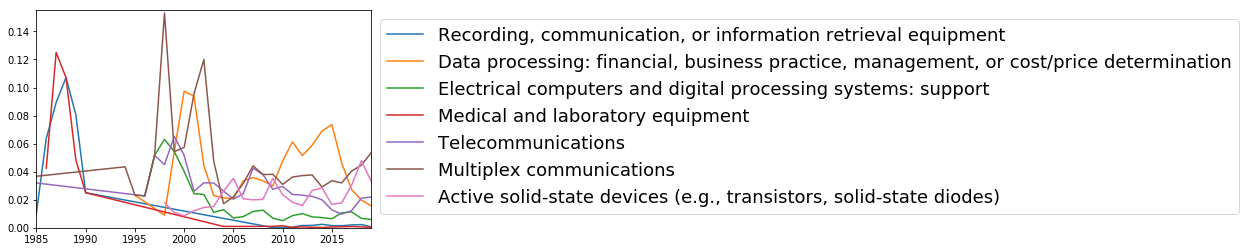

In [38]:
import matplotlib.pyplot as plt
import numpy as np

plt.axis([1985, 2019, 0, 0.155])
for i in {'D14', 'D24', '370', '713', '455', '705', '257'}:
    data = yearClassShares.filter(lambda x: x[0][1] == i)
    data = data.map(lambda y: (y[0][0], y[1])).sortBy(lambda x: x[0], True).collect()
    data = zip(*data)
    print data
    x = data[0]
    y = data[1]
    plt.plot(x, y, label=classDict.get(i))

plt.legend(loc='upper left', prop={'size':18}, bbox_to_anchor=(1,1))
plt.show()

[[0.034482758620689655, 0.022727272727272728, 0.05172413793103448, 0.04504504504504504, 0.06521739130434782, 0.05157593123209169, 0.026041666666666668, 0.03205791106514995, 0.03195390256678889, 0.026179702650290886, 0.020492866407263294, 0.024231678486997636, 0.042487538571089487, 0.03794642857142857, 0.02748735244519393, 0.029479890503263845, 0.023784901758014478, 0.02325311010347634, 0.022409512609434207, 0.019928486293206198, 0.012763790304612152, 0.009728607872245363, 0.012241989645475012, 0.021153056449533487, 0.021916742316171703], [1982, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]]


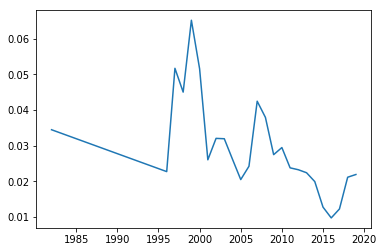

In [105]:
data = [list(data[1]), list(data[0])]
print data
x = data[1]
y = data[0]
plt.plot(x, y)

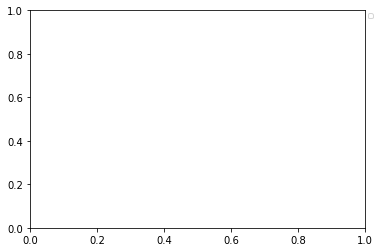

In [35]:

plt.legend(loc='upper left', prop={'size':6}, bbox_to_anchor=(1,1))
plt.show()